In [2]:
from sklearn import svm
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
def k_partition(seq, k):
	avg = len(seq) / float(k)
	out = []
	last = 0.0
	while last < len(seq):
		out.append(seq[int(last):int(last + avg)])
		last += avg
	return out

1 :  0.931847548616
2 :  0.94441640526
3 :  0.951908417013
4 :  0.958432784817
5 :  0.960850580353
6 :  0.963509337633
7 :  0.966167802838
8 :  0.967859500318
9 :  0.969309651905
10 :  0.970517381374
11 :  0.970759219342
12 :  0.972209370929
13 :  0.972451208898
14 :  0.97293459276
15 :  0.973176430729
16 :  0.973901360485
17 :  0.974626290241
18 :  0.974625998166
19 :  0.974142906378
20 :  0.974384744347
21 :  0.975351512071
22 :  0.975109674103
23 :  0.975109674103
24 :  0.975351219997
25 :  0.975350927922
26 :  0.975350927922
27 :  0.975350927922
28 :  0.975350927922
29 :  0.975592181741
30 :  0.976317111497
31 :  0.976317111497
32 :  0.976317111497
33 :  0.976317111497
34 :  0.976317111497
35 :  0.976075565603
36 :  0.976075565603
37 :  0.975833727634
38 :  0.975833727634
39 :  0.975833727634
40 :  0.975833727634
41 :  0.976075565603
42 :  0.976317111497
43 :  0.976558949465
44 :  0.976800787434
45 :  0.976800787434
46 :  0.976558949465
47 :  0.976558949465
48 :  0.976317111497
49 

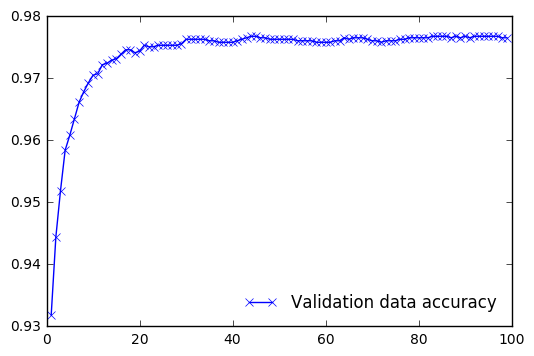

In [6]:
pathname = 'hw01_data/'

spam = scipy.io.loadmat(pathname + 'spam/spam_data_BOW_validation.mat')
all_validation_accuracy = []
# all_C = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
all_C = list(range(1, 100))

all_training_data = spam['training_data']
all_training_labels = spam['training_labels'].ravel()

idx = list(range(0,all_training_data.shape[0]))
random.shuffle(idx)

k = 5
idx_k = k_partition(idx, k)

for C in all_C:
	
	k_accuracy = []
	for i in range(0, k):
		validation_idx = idx_k[i]
		training_idx = list(set(validation_idx)^set(idx))
		training_data = all_training_data[training_idx]
		training_labels = all_training_labels[training_idx]
		validation_data = all_training_data[validation_idx]
		validation_labels = all_training_labels[validation_idx]
		clf = svm.LinearSVC(C=C)
		clf.fit(training_data, training_labels)
		training_predict = clf.predict(training_data)
		validation_predict = clf.predict(validation_data)
		validation_match = np.equal(validation_labels, validation_predict)
        validation_accuracy = sum(validation_match) / len(validation_match)
		# print(validation_accuracy)
		k_accuracy.append(validation_accuracy)
	print(C, ': ', sum(k_accuracy)/float(k))
	all_validation_accuracy.append(sum(k_accuracy)/float(k))
print(all_validation_accuracy)

max_idx = all_validation_accuracy.index(max(all_validation_accuracy))
print('Max***', all_C[max_idx], ': ', max(all_validation_accuracy))

plt.plot(all_C, all_validation_accuracy, label='Validation data accuracy', marker='x')
plt.legend(loc='lower right', frameon=False)
plt.show()

Note:
C~=50 for SPAM with bag-of-words features